# **DBSCAN**

## **Implementacion**

In [28]:
import numpy as np
import matplotlib.pyplot as plt

from math import e
from random import randint, uniform
from sklearn.datasets import make_circles

In [17]:
class DBS:
  def __init__(self, X):
    self.X = X

  def d(self, x, y):
    """ Distancia Euclidiana. """
    return np.linalg.norm(x-y)

  def query(self, x, dist):
    """ Calculamos los vecinos de un elemento dada una distancia minima. """
    neighbors = []
    for x_i in self.X:
      # Si la distancia entre x y x_i es menos a la distancia minima, entonces
      # x_i es un vecino de x.
      if self.d(x, x_i) <= dist:
        neighbors.append(x_i)
    return neighbors

  def clustering(self, dist, min_x):
    """ Agrupamos los datos usando el metodo de DBScan. """
    # Contador de clusters.
    C = -1
    # Diccionario  label[x] -> C  tal que   x in C
    labels = {tuple(x) : None for x in self.X}
    
    for x in self.X:
      # Si el elemento ya fue etiquetado, pasamos al siguiente.
      if labels[tuple(x)] != None: continue
      neighbors = self.query(x, dist)
    
      # Si el elemento no tiene suficientes vecinos, es un dato atipico.
      if len(neighbors) < min_x:
        labels[tuple(x)] = -1
        continue
        
      # Pasamos a un nuevo cluster, etiquetamos el elemento con el cluster actual.
      C += 1
      labels[tuple(x)] = C
      # Sacamos al elemento de sus propios vecinos y creamos el conjunto semilla.
      neighbors.pop(neighbors.index(x))
      seed_set = neighbors.copy()
        
      for s in seed_set:
        # Si el elemento fue consierado atipico, ahora sera etiquetado con el
        # cluster actual.
        if labels[tuple(s)] == -1: labels[tuple(s)] = C
        # Si ya tiene etiqueta, pasamos al siguiente elemento.
        if labels[tuple(s)] != None: continue
            
        # Etiquetamos al elemento con el cluster actual.
        labels[tuple(s)] = C
        # Calculamos los vecinos del elemento.
        neighbors = self.query(s, dist)
        # Si el elemento tiene suficientes vecinos.
        if len(neighbors) >= min_x:
          # Unimos los conjuntos "neighbors" y "seed_set"
          for n in neighbors: 
            if not any(np.equal(n, ss).all() for ss in seed_set): seed_set.append(n)
                
    return labels
    

## **Lectura de Datos**

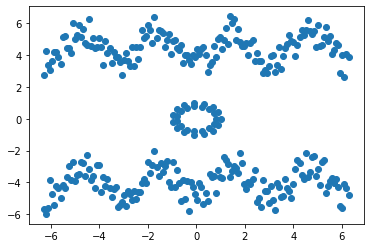

In [40]:
nb_samples = 150

X0 = np.expand_dims(np.linspace(-2 * np.pi, 2 * np.pi, nb_samples), axis=1)
Y0 = -5 - np.cos(2.0 * X0) + np.random.uniform(0.0, 2.0, size=(nb_samples, 1))
 
X1 = np.expand_dims(np.linspace(-2 * np.pi, 2 * np.pi, nb_samples), axis=1)
Y1 = 3.5 - np.cos(2.0 * X0) + np.random.uniform(0.0, 2.0, size=(nb_samples, 1))
 
data_0 = np.concatenate([X0, Y0], axis=1)
data_1 = np.concatenate([X1, Y1], axis=1)
data = np.concatenate([data_0, data_1], axis=0)
data = [d for d in data]
for c in make_circles(30)[0]: data.append(c)

plt.plot([d[0] for d in data], [d[1] for d in data], 'o')
plt.show()


## **Resultados**

In [41]:
dbs = DBS(data)
labels = dbs.clustering(1.5, 5)

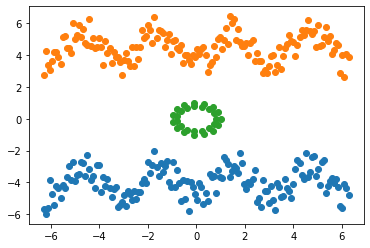

In [42]:
clusters = [[] for _ in range(max(labels.values())+2)]
for x in labels:
  clusters[labels[tuple(x)]].append(x)
for c in clusters[:]:
  plt.plot([x[0] for x in c], [x[1] for x in c], 'o')
plt.show()